In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
X_features = df[['Age', 'EstimatedSalary']]
Y_target = df.Purchased
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_target, test_size=0.3, random_state=5)

**Feature Scaling**

In [5]:
# Standardization
func = StandardScaler()
func.fit(X_train)
transf_xtrain = func.transform(X_train)
transf_xtest = func.transform(X_test)

**Fitting K-NN to the Training set**

In [6]:
model = KNeighborsClassifier()
model.fit(transf_xtrain, Y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [7]:
Y_pred = model.predict(transf_xtest)

**Making the Confusion Matrix**

In [8]:
confusion_matrix(Y_test, Y_pred)

array([[73,  5],
       [ 5, 37]], dtype=int64)

In [9]:
accuracy_score(Y_test, Y_pred)

0.9166666666666666

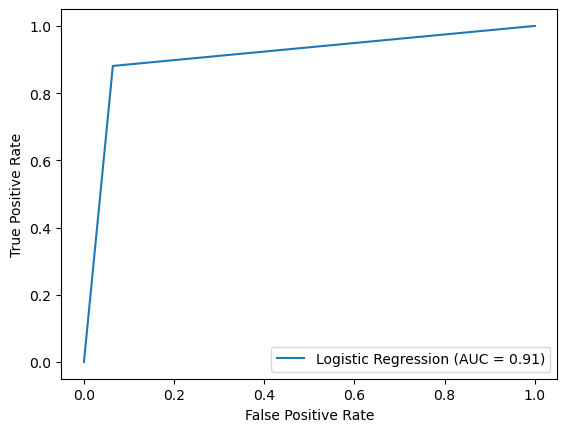

In [11]:
fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name='Logistic Regression')
display.plot()